# Scott Breitbach
## 31-May-2021
## DSC550, Milestone 5: Final Project

# Case Study: Beans

## Introduction

My initial intention with this project was to utilize a data set from a project I’ve been working on in my job in the hopes of getting not just a better understanding of the process, but hopefully gaining some insights into how the process could be improved. Unfortunately, I quickly realized that the data set I was using was maybe not ideal for applying the topics covered in this class. There is lots of missing data and by the time the useful data gets sorted out, there really wasn’t enough left to work with.  

Following this minor setback, I was able to find another data set about dry beans that was not just a better fit for this class, but also appealed to some of my interests. I grew up farming and considered going into plant genetics before falling into the field of microbiology.  So a data set about a food crop felt like a good option with which to proceed.


## Business Problem / Data

Dry beans are an important food crop worldwide. There is a lot of diversity in bean varieties and both classification and seed quality are important factors in the agricultural industry for maximizing production in order to feed the growing world population.  

This data set was created utilizing computer vision to automatically generate 16 features based on high resolution images of 13,611 individuals from 7 different kinds of beans. These features are based on various measurements of the beans on 12 form dimensions (such as area, length, and perimeter) and 4 shape factors.  

With an effective method to classify beans, the agricultural needs of bean uniformity can be met, both in regards to sorting beans as well as quality and consistency within bean varieties.  

Data source: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [1]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Data

In [2]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [3]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The values for different features vary by orders of magnitude, so these will need to be scaled prior to modeling. 

In [4]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [5]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

We can see here that an immediate improvement to the data set would be to increase the number of data points for beans like 'CALI', 'BARBUNYA', and particularly 'BOMBAY', or better yet make the entire data set more uniform by increasing the data points for each bean to around 3,500 in order to match 'DERMASON'. 

## Graphical Analysis

In [18]:
# Load libraries
import matplotlib.pyplot as plt

# Set up figure size
plt.rcParams['figure.figsize'] = (15, 10)

### Visualize Relative Counts by Class (the target variable)

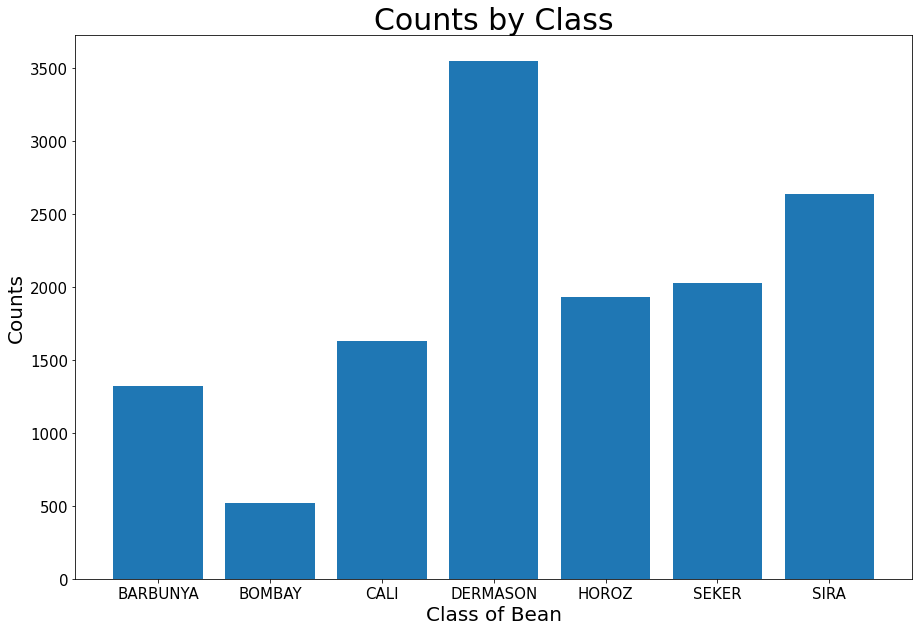

In [19]:
# Get the data ready to feed into the visualizer
X_Class = beanDF.groupby('Class').size().reset_index(name='Counts')['Class']
Y_Class = beanDF.groupby('Class').size().reset_index(name='Counts')['Counts']

# Make the 1st bar plot
plt.bar(X_Class, Y_Class)
plt.title('Counts by Class', fontsize=30)
plt.xlabel('Class of Bean', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

plt.show()

<AxesSubplot:xlabel='Class'>

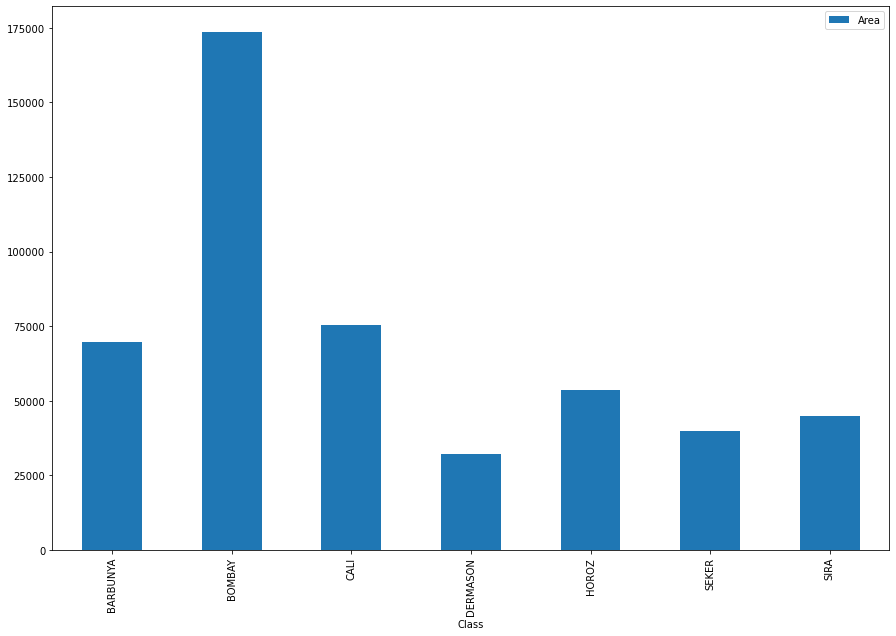

In [20]:
beanDF.groupby('Class').aggregate({'Area':'mean'}).plot(kind='bar')

In [ ]:
beanDF.groupby('Class').aggregate({'Area':'mean'}).plot(kind='bar')

In [28]:
beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Class']

0    BARBUNYA
1      BOMBAY
2        CALI
3    DERMASON
4       HOROZ
5       SEKER
6        SIRA
Name: Class, dtype: object

In [29]:
beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Area']

0     69804.133132
1    173485.059387
2     75538.211043
3     32118.710942
4     53648.508817
5     39881.299951
6     44729.128604
Name: Area, dtype: float64

In [55]:
sorted(beanDF.Class.unique())

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [78]:
beanDF.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Compactness')

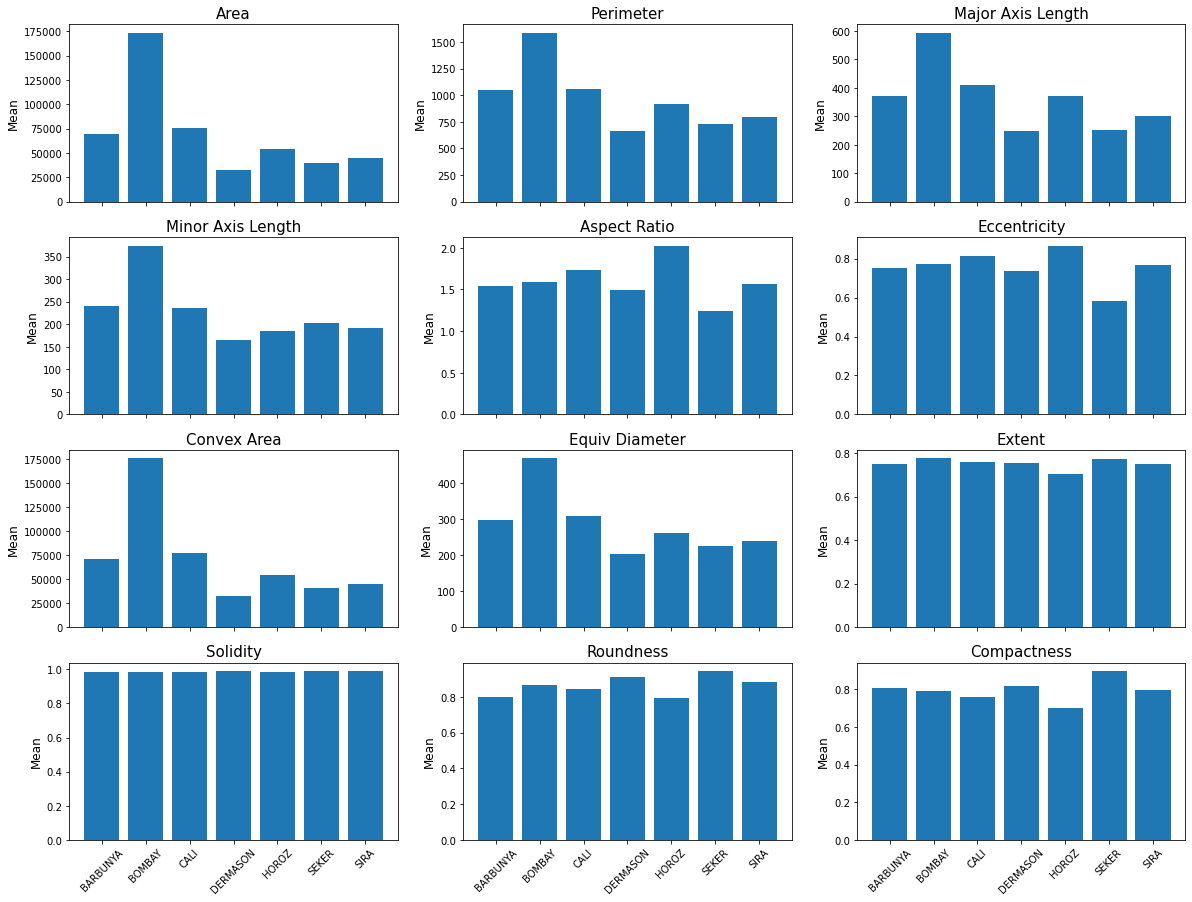

In [88]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Make subplots
fig, axes = plt.subplots(nrows=4, ncols=3, sharex='col')

# Set font sizes
title  = 15
yLabel = 12
ticks  = 8
# Set up axes / ticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.ylabel('Mean', fontsize=yLabel)

## PLOT 1 - AREA
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Area']
# Build chart
axes[0, 0].bar(X_Axis, Y_Axis)
axes[0, 0].set_title('Area', fontsize=title)
# axes[0, 0].set_ylabel('Mean', fontsize=yLabel)
# axes[0, 0].tick_params(axis='y', labelsize=ticks)
# axes[0, 0].tick_params(axis='x', labelsize=ticks, labelrotation=-25)

## PLOT 2 - PERIMETER
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Perimeter':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Perimeter':'mean'}).reset_index('Class')['Perimeter']
# Build chart
axes[0, 1].bar(X_Axis, Y_Axis)
axes[0, 1].set_title('Perimeter', fontsize=title)

## PLOT 3 - MAJOR AXIS LENGTH
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'MajorAxisLength':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'MajorAxisLength':'mean'}).reset_index('Class')['MajorAxisLength']
# Build chart
axes[0, 2].bar(X_Axis, Y_Axis)
axes[0, 2].set_title('Major Axis Length', fontsize=title)

## PLOT 4 - MINOR AXIS LENGTH
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'MinorAxisLength':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'MinorAxisLength':'mean'}).reset_index('Class')['MinorAxisLength']
# Build chart
axes[1, 0].bar(X_Axis, Y_Axis)
axes[1, 0].set_title('Minor Axis Length', fontsize=title)

## PLOT 5 - ASPECT RATIO
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'AspectRation':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'AspectRation':'mean'}).reset_index('Class')['AspectRation']
# Build chart
axes[1, 1].bar(X_Axis, Y_Axis)
axes[1, 1].set_title('Aspect Ratio', fontsize=title)

## PLOT 6 - ECCENTRICITY
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Eccentricity':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Eccentricity':'mean'}).reset_index('Class')['Eccentricity']
# Build chart
axes[1, 2].bar(X_Axis, Y_Axis)
axes[1, 2].set_title('Eccentricity', fontsize=title)

## PLOT 7 - CONVEX AREA
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ConvexArea':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ConvexArea':'mean'}).reset_index('Class')['ConvexArea']
# Build chart
axes[2, 0].bar(X_Axis, Y_Axis)
axes[2, 0].set_title('Convex Area', fontsize=title)

## PLOT 8 - EQUIV DIAMETER
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'EquivDiameter':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'EquivDiameter':'mean'}).reset_index('Class')['EquivDiameter']
# Build chart
axes[2, 1].bar(X_Axis, Y_Axis)
axes[2, 1].set_title('Equiv Diameter', fontsize=title)

## PLOT 9 - EXTENT
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Extent':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Extent':'mean'}).reset_index('Class')['Extent']
# Build chart
axes[2, 2].bar(X_Axis, Y_Axis)
axes[2, 2].set_title('Extent', fontsize=title)

## PLOT 10 - SOLIDITY
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Solidity':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Solidity':'mean'}).reset_index('Class')['Solidity']
# Build chart
axes[3, 0].bar(X_Axis, Y_Axis)
axes[3, 0].set_title('Solidity', fontsize=title)

## PLOT 11 - ROUNDNESS
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'roundness':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'roundness':'mean'}).reset_index('Class')['roundness']
# Build chart
axes[3, 1].bar(X_Axis, Y_Axis)
axes[3, 1].set_title('Roundness', fontsize=title)

## PLOT 12 - COMPACTNESS
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Compactness':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Compactness':'mean'}).reset_index('Class')['Compactness']
# Build chart
axes[3, 2].bar(X_Axis, Y_Axis)
axes[3, 2].set_title('Compactness', fontsize=title)

## Dimensionality & Feature Reduction / Engineering

## Model Selection & Evaluation

## Conclusion